## EDA on Students Exam Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing The Data

In [2]:
data = pd.read_csv("data/student.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [6]:
data['gender'].dtypes

dtype('O')

In [7]:
data['gender'].dtypes=='O'

True

In [8]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
cat_col = [fea for fea in data.columns if data[fea].dtypes == 'O']   #Splitting dataFrame into categorical data columns

In [10]:
num_col = [fea for fea in data.columns if data[fea].dtypes != 'O']   #Splitting dataFrame into numerical data columns

In [11]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [12]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [13]:
data.memory_usage()         #How much memory it will consume

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Missing value

In [14]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no any missing value.

In [15]:
data.duplicated().sum()       # Checking duplicate values.

0

In [16]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [19]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [20]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [21]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

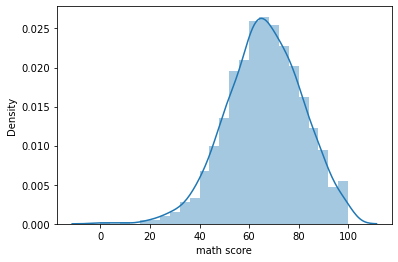

In [22]:
sns.distplot(data['math score'])

In [23]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
data['Average'] = (data['math score']+data['reading score']+data['writing score'])/3   # Adding new column in the dataframe.

In [25]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [26]:
data.groupby('gender').mean()

,math score,reading score,writing score,Average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [27]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [28]:
data[data['math score'] < 30] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [29]:
data[data['math score'] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Average                        14
dtype: int64

## Checking normality of the data

In [30]:
data_num = data[num_col]

In [31]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [32]:
from scipy.stats import normaltest

In [33]:
_,p_value = normaltest(data_num['math score'])

In [34]:
p_value

0.00045080293869937836

In [35]:
if p_value < 0.05 :
    print("Data is non-normal")
else :
    print("Data is normal")

Data is non-normal


### By the help of normality test we can say the data is non-normal

### Checking normality by graph

<AxesSubplot:xlabel='math score', ylabel='Density'>

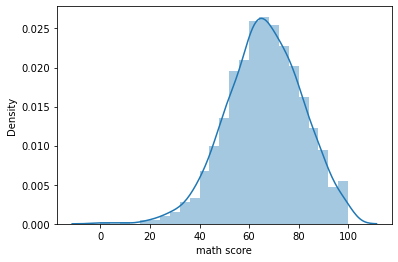

In [36]:
sns.distplot(data_num['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

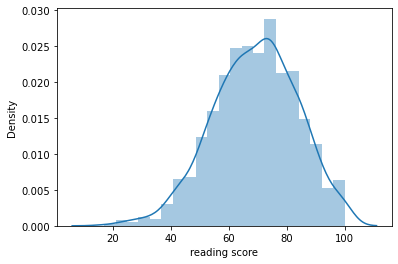

In [37]:
sns.distplot(data_num['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

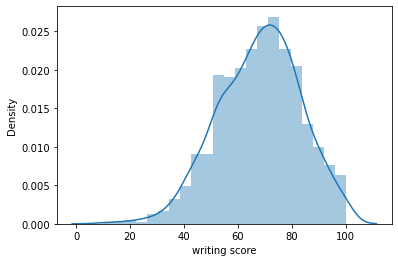

In [38]:
sns.distplot(data_num['writing score'])

### Data is little bit left-skewed.

## Outlier Detection

<AxesSubplot:>

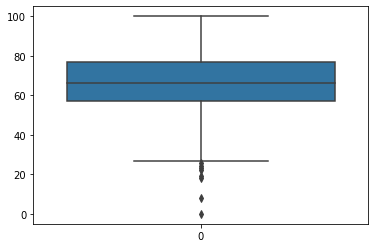

In [39]:
sns.boxplot(data=data['math score'])

<AxesSubplot:>

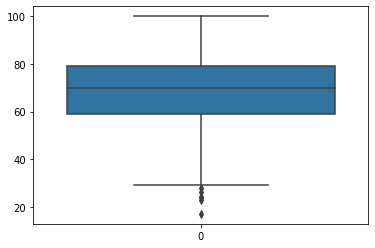

In [40]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:>

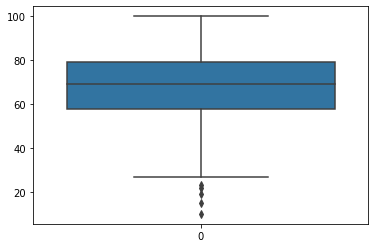

In [41]:
sns.boxplot(data=data['writing score'])

### There are some outliers in the data.

### Handling the outliers

In [42]:
q1 = data['math score'].quantile(0.25)
q1

57.0

#### There are 47 data points which are below 25%

In [43]:
q3 = data['math score'].quantile(0.75)
q3

77.0

#### There are 86 data values which are lie below the 75%

In [44]:
IQR = q3 - q1

In [45]:
Upper_limit = q3 + (1.5*IQR)
Upper_limit

107.0

In [46]:
Lower_limit = q1 - (1.5*IQR)
Lower_limit

27.0

In [47]:
data[data['math score']<Lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


### These are the outliers

### Handling the outliers with function

In [48]:
def outlier_threshold(df,variable) :
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    return lower_limit, upper_limit

In [49]:
outlier_threshold(data,data_num.columns)

(math score       27.000
 reading score    29.000
 writing score    25.875
 dtype: float64,
 math score       107.000
 reading score    109.000
 writing score    110.875
 dtype: float64)

In [50]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit


In [51]:
replace_with_threshold(data_num,data_num.columns)

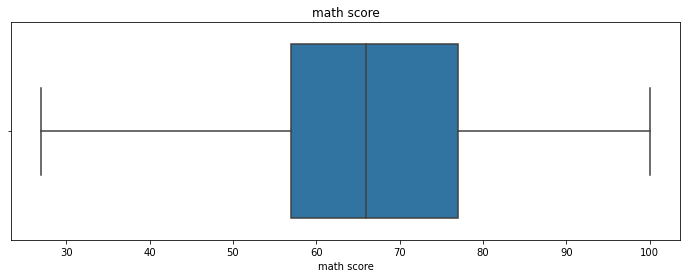

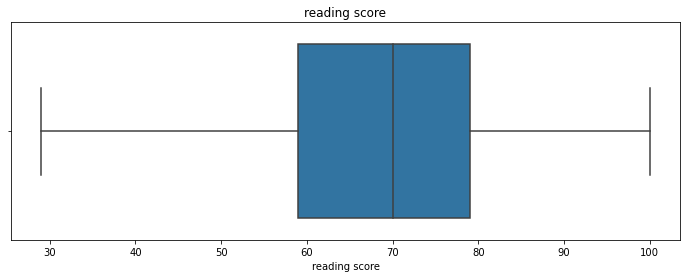

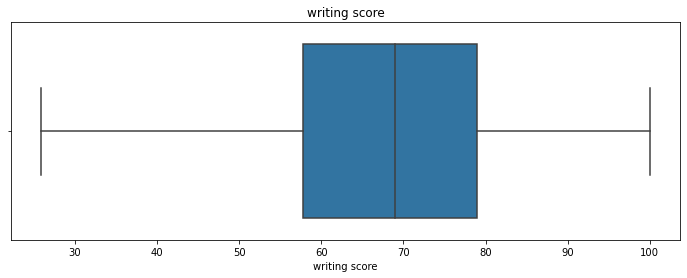

In [52]:
for col in data_num.columns:                #checking the ouliers are removed?
    plt.figure(figsize=(12,4))
    sns.boxplot(data_num[col])
    plt.title(col)

### Now all outliers are replced by its thresholds, there is no any outlier in the new data.

In [53]:
data_num.to_csv("new_data_num.csv")              # Saving the csv file for further analysis.

## Graphical Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

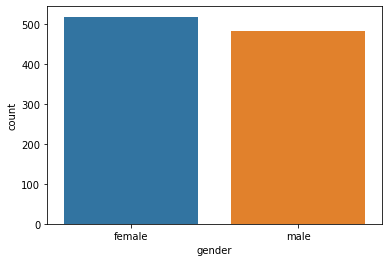

In [54]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

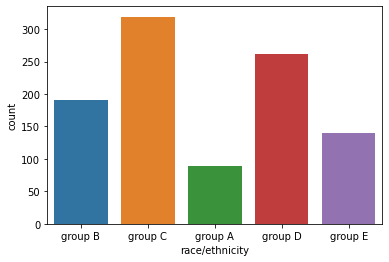

In [55]:
sns.countplot(data['race/ethnicity'])

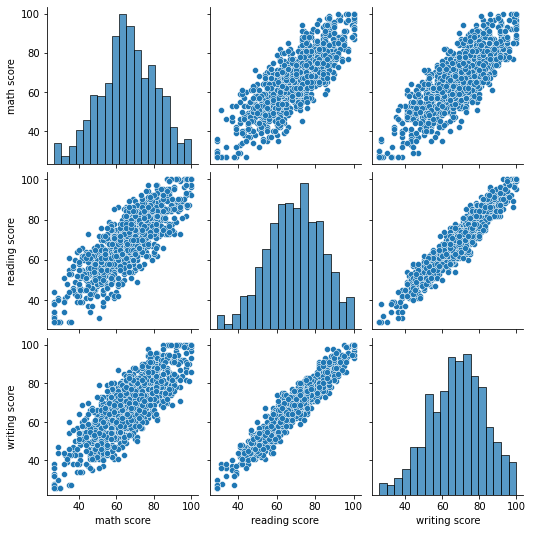

In [56]:
sns.pairplot(data_num)

In [57]:
df = data.groupby('gender').mean()
df

,math score,reading score,writing score,Average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [58]:
df['Average']

gender
female    69.569498
male      65.837483
Name: Average, dtype: float64

In [59]:
df['Average'][0]

69.56949806949807

In [60]:
df['Average'][1]

65.8374827109267

In [61]:
df['math score'][0]

63.633204633204635

In [62]:
df['math score'][1]

68.72821576763485

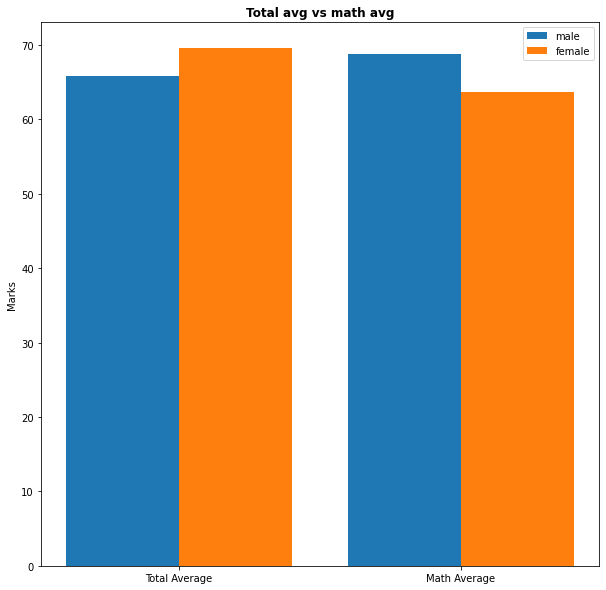

In [63]:
plt.figure(figsize=(10,10))
X = ['Total Average','Math Average']
female_score = df['Average'][0],df['math score'][0]
male_score = df['Average'][1],df['math score'][1]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')


plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total avg vs math avg", fontweight='bold')
plt.legend()
plt.show()

In [64]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.815727,0.799954
reading score,0.815727,1.000000,0.954040
writing score,0.799954,0.954040,1.000000


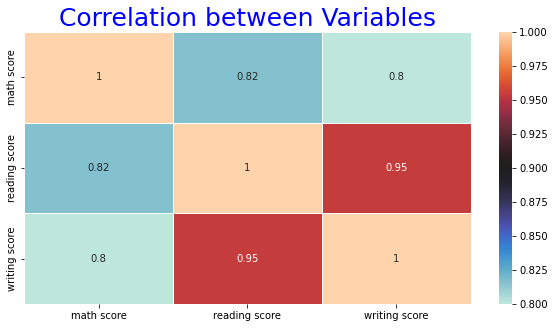

In [65]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidth=0.5)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title("Correlation between Variables",color='blue',size=25)
plt.show()